<a href="https://colab.research.google.com/github/DeepaliVerma/personal_files/blob/main/Image_Denoising_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/abhirooptalasila/ML-Projects/tree/master/Image%20Denoising%20using%20Convolutional%20Autoencoders

In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#add noises
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

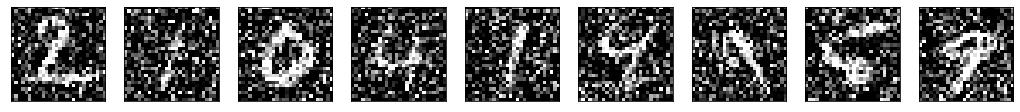

In [5]:
#plot noisy data
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
#model
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same',  strides=2)(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 32)        0   

In [12]:
#compile and Fit
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

early = EarlyStopping(monitor="val_loss", mode="min", patience=5)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[early])

Epoch 1/50
469/469 [==============================] - 99s 209ms/step - loss: 0.1563 - acc: 0.8088 - val_loss: 0.1119 - val_acc: 0.8103
Epoch 2/50
469/469 [==============================] - 100s 214ms/step - loss: 0.1095 - acc: 0.8118 - val_loss: 0.1055 - val_acc: 0.8114
Epoch 3/50
469/469 [==============================] - 101s 216ms/step - loss: 0.1050 - acc: 0.8124 - val_loss: 0.1026 - val_acc: 0.8116
Epoch 4/50
469/469 [==============================] - 101s 216ms/step - loss: 0.1027 - acc: 0.8127 - val_loss: 0.1010 - val_acc: 0.8120
Epoch 5/50
469/469 [==============================] - 101s 215ms/step - loss: 0.1012 - acc: 0.8129 - val_loss: 0.0999 - val_acc: 0.8122
Epoch 6/50
469/469 [==============================] - 101s 216ms/step - loss: 0.1003 - acc: 0.8130 - val_loss: 0.0995 - val_acc: 0.8124
Epoch 7/50
469/469 [==============================] - 101s 214ms/step - loss: 0.0996 - acc: 0.8131 - val_loss: 0.0984 - val_acc: 0.8122
Epoch 8/50
469/469 [=============================

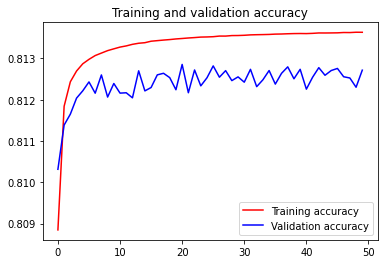

<Figure size 432x288 with 0 Axes>

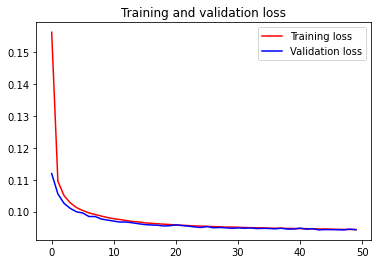

<Figure size 432x288 with 0 Axes>

In [13]:
#plot accuracy and loss curves

def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()
  plt.show()
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend(loc=0)
  plt.figure()
  plt.show()

plot_history(history)

In [14]:
#predict on sample

test_img = np.expand_dims(x_test_noisy[0].reshape(28, 28, 1), axis=0)
img_pred = autoencoder.predict(test_img)

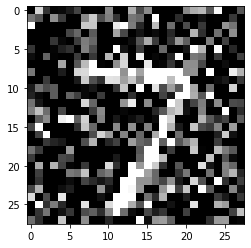

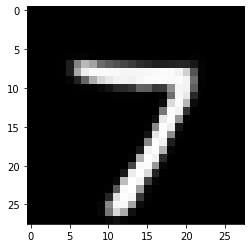

In [15]:
%matplotlib inline 

plt.imshow(np.squeeze(x_test_noisy[0].reshape(28, 28, 1)), interpolation='nearest')
plt.show()
plt.imshow(np.squeeze(img_pred), interpolation='nearest')
plt.show()